In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv" , delimiter="," , header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [ ]:
df.shape

(24983, 101)

In [ ]:
df = df.replace(99 , np.NaN)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [ ]:
df = df.drop(df.columns[0] ,axis =1)
df.head()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [ ]:
arr = df.values
print(arr.shape)

(24983, 100)


In [ ]:
rated = np.where(~np.isnan(arr))
print(len(rated[0]), rated[1].shape)

1810455 (1810455,)


In [ ]:
def replace(orig, percentage=0.1):
  
  new_data = orig.copy()
  rated = np.where(~np.isnan(new_data))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [ ]:
new_arr, idx = replace(arr, 0.1)

In [ ]:
arr[idx[0][0], idx[1][0]]

-8.54

In [ ]:
new_arr[idx[0][0], idx[1][0]]  #this is validation set

99.0

In [ ]:
n_latent_factors = 2

In [ ]:
user_ratings = new_arr

latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))


In [ ]:
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))

In [ ]:
latent_item_features

array([[0.143, 0.9  ],
       [0.503, 0.571],
       [0.994, 0.196],
       [0.817, 0.467],
       [0.142, 0.09 ],
       [0.398, 0.71 ],
       [0.177, 0.735],
       [0.19 , 0.897],
       [0.265, 0.872],
       [0.195, 0.858],
       [0.763, 0.949],
       [0.715, 0.332],
       [0.127, 0.299],
       [0.213, 0.637],
       [0.797, 0.106],
       [0.312, 0.23 ],
       [0.414, 0.795],
       [0.242, 0.072],
       [0.985, 0.562],
       [0.434, 0.644],
       [0.022, 0.666],
       [0.413, 0.51 ],
       [0.124, 0.023],
       [0.512, 0.745],
       [0.942, 0.538],
       [0.698, 0.552],
       [0.414, 0.504],
       [0.319, 0.591],
       [0.987, 0.394],
       [0.54 , 0.241],
       [0.866, 0.579],
       [0.713, 0.493],
       [0.878, 0.737],
       [0.655, 0.804],
       [0.542, 0.395],
       [0.081, 0.878],
       [0.623, 0.726],
       [0.715, 0.564],
       [0.914, 0.514],
       [0.793, 0.264],
       [0.456, 0.621],
       [0.823, 0.036],
       [0.069, 0.107],
       [0.9

In [ ]:
latent_user_preferences

array([[0.208, 0.305],
       [0.663, 0.588],
       [0.54 , 0.878],
       ...,
       [0.89 , 0.366],
       [0.071, 0.469],
       [0.847, 0.725]])

In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating) and rating!=99.00:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 2) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/50:	MSE=19.778370
Iteration 2/50:	MSE=19.227521
Iteration 4/50:	MSE=18.690652
Iteration 6/50:	MSE=18.238596
Iteration 8/50:	MSE=17.902661
Iteration 10/50:	MSE=17.670624
Iteration 12/50:	MSE=17.513525
Iteration 14/50:	MSE=17.405625
Iteration 16/50:	MSE=17.329376
Iteration 18/50:	MSE=17.273837
Iteration 20/50:	MSE=17.232285
Iteration 22/50:	MSE=17.200516
Iteration 24/50:	MSE=17.175816
Iteration 26/50:	MSE=17.156369
Iteration 28/50:	MSE=17.140914
Iteration 30/50:	MSE=17.128544
Iteration 32/50:	MSE=17.118591
Iteration 34/50:	MSE=17.110551
Iteration 36/50:	MSE=17.104036
Iteration 38/50:	MSE=17.098744
Iteration 40/50:	MSE=17.094437
Iteration 42/50:	MSE=17.090927
Iteration 44/50:	MSE=17.088064
Iteration 46/50:	MSE=17.085728
Iteration 48/50:	MSE=17.083821


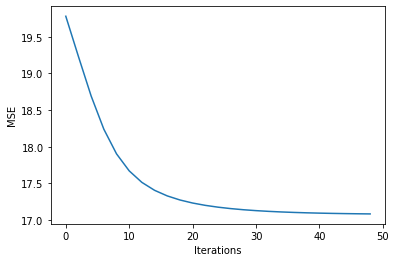

In [ ]:
#perfomance of algorithm on validation set , validation set is new_arr
num_iter = 50
hist = sgd(num_iter)
plt.figure()
plt.plot(np.arange(0, num_iter, 2), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
#predictions on test set

predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-4.025, -4.408, -5.736, ..., -2.584, -6.099, -2.589],
       [ 2.942,  3.154,  3.77 , ...,  2.403,  3.854,  2.573],
       [ 6.956,  7.241,  7.577, ...,  7.3  ,  7.208,  8.225],
       ...,
       [-0.28 , -0.315, -0.452, ..., -0.116, -0.5  , -0.095],
       [-2.004, -2.219, -3.006, ..., -1.105, -3.25 , -1.048],
       [ 2.657,  2.676,  2.336, ...,  3.465,  1.958,  4.037]])

In [ ]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = df.columns

In [ ]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -4.025149757134148)","(8.79, -4.407642603860908)","(-9.66, -5.736005231038304)","(-8.16, -9.492798821130839)","(-7.52, -2.877274943636037)","(-8.5, -1.9442092281326069)","(-9.85, -5.095172688673971)","(4.17, -4.3536795301025695)","(-8.98, -8.841909121622592)","(-4.76, -3.8934474412449043)","(-8.5, -1.8624843560154332)","(-6.75, -2.0035682543595486)","(-7.18, -6.539237982436808)","(8.45, -1.8339262060306518)","(99.0, -6.604707039696611)","(-7.52, -10.124320059916142)","(-7.43, -4.559743649412377)","(-9.81, -5.432194510487695)","(-9.85, -3.986637699335511)","(-9.85, -6.283018793146941)","(-9.37, 0.1113900821842187)","(1.5, -4.531808023689947)","(-4.37, -6.21248111330526)","(-9.81, -10.454128803562531)","(99.0, -4.856282743435372)","(1.12, -1.910830918172542)","(7.82, 3.1934569124597885)","(2.86, -1.8972508081391513)","(9.13, 3.278067518822265)","(-7.43, -7.993258269591465)","(2.14, 0.8190450714850903)","(-4.08, 3.060343787965394)","(-9.08, -9.430937203223634)","(99.0, -2.9779395071372687)","(5.05, 2.61202420757672)","(4.95, 3.4210894970824732)","(-9.17, -9.099038632088408)","(-8.4, -3.6861012270076405)","(-8.4, -2.7668105004065673)","(-8.4, -3.8387631597635306)",...,"(8.59, 0.9648501348376989)","(3.59, 1.8386483098687332)","(-6.84, -5.545446904624957)","(99.0, -8.366546866287027)","(2.82, 1.03322256649884)","(-1.36, 1.275825639688578)","(-9.08, -8.836283877981383)","(8.3, 1.5022969177908916)","(5.68, 1.4742739565555434)","(-4.81, -4.856058445588312)","(nan, -6.612189372838625)","(nan, 1.0713376438788265)","(nan, -3.3423299579168204)","(nan, -9.056291217761823)","(nan, -5.837171189647731)","(nan, 0.5007354452768308)","(nan, -4.19603058571106)","(-9.42, -2.217935477229484)","(nan, -5.360459836748434)","(nan, -2.7771657669610255)","(nan, -1.4808948132348954)","(-7.72, -4.560203054028923)","(nan, -0.3756050136042746)","(nan, -4.744442856434008)","(nan, -4.074780017620437)","(nan, -6.148353674860176)","(nan, -1.1703830564680662)","(nan, -1.2883295846881104)","(nan, 3.086759588645762)","(nan, -5.249557248331761)","(2.82, -1.5977929987950596)","(nan, -3.2147521803557804)","(nan, 0.16855577398920618)","(nan, -4.641774959971257)","(nan, -3.9613959648935095)","(nan, -2.8655296250419244)","(-5.63, -2.0590539926080846)","(nan, -2.5842903197194866)","(nan, -6.099066324850608)","(nan, -2.588809521033689)"
1,"(4.08, 2.9423394618048557)","(-0.29, 3.1537761804309694)","(99.0, 3.76959470148497)","(4.37, 5.294641855065998)","(99.0, 2.2182902077990403)","(-9.66, 2.370841091028541)","(-0.73, 3.0504513649226244)","(-5.34, 2.3798473393603707)","(8.88, 5.097066953103417)","(9.22, 2.9592524037573664)","(6.75, 2.298706908316136)","(8.64, 2.458404193646153)","(99.0, 3.2780698560152355)","(7.43, 2.3631779921018135)","(4.56, 3.1724871924013023)","(-0.97, 4.628805967047374)","(4.66, 2.539404718918502)","(-0.68, 3.0506366410339587)","(3.3, 2.728957767601708)","(-1.21, 3.678581133547136)","(0.87, 1.4867788126631416)","(8.64, 3.454677741046165)","(8.35, 4.015271025765112)","(9.17, 5.577528071443523)","(99.0, 3.5260104714810128)","(7.57, 2.3677314074034643)","(4.71, 0.00812277714555669)","(0.87, 2.284938491367579)","(-0.39, -0.11587478134078154)","(99.0, 4.874623185676548)","(6.5, 1.1046373166176593)","(-0.92, 0.06744677524136758)","(7.14, 5.266300357259049)","(9.03, 2.7234261078750874)","(-1.8, 0.297788822986382)","(0.73, -0.1662894771602157)","(99.0, 4.934133632293158)","(3.4, 3.024085420998367)","(-0.87, 2.7196667130875527)","(7.91, 3.1447559750913054)",...,"(-6.7, 1.1099505179912872)","(-3.35, 0.6933773948225183)","(-9.03, 3.7704072958707324)","(4.47, 4.768882575409731)","(4.08, 1.0121168896002644)","(-3.83, 0.8993489572543175)","(99.0, 5.016907835589235)","(1.12, 0.7645120111887576)","(0.78, 0.839920120252344)","(

#### Quiz questions work

In [ ]:
df.iloc[11740,61]

-1.36

In [ ]:
#to find worst rated joke
means = df.mean(axis = 0)

In [ ]:
min(means)

-3.8338796373689923

In [ ]:
means[means.eq(-3.8338796373689923)]

58   -3.83388
dtype: float64